
<h1 style="text-align: center;">Hello! Welcome to my notebook❤️


<img src="https://revenue-hub.com/wp-content/uploads/2020/07/netflix-hotels-can-learn.jpg" alt="Udemy Image" width="800" height="800" style="display: block; margin: auto;">

<h1>Importing Libraries

In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


<h1>Reading Data

In [85]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

<h1>Data Cleaning ,Exploratory and Analysis 

In [86]:
df.head() #first 5 rows 
#df.iloc[:5,:] #another way

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [87]:
df.shape #(rows,cols)

(8807, 12)

In [88]:
#show no of total values in the dataset
df.size 

105684

In [89]:
#Checking statistics of columns for the int64 data type
df.describe(include=['object'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [90]:
df.shape

(8807, 12)

In [91]:
df['show_id'].nunique() # unique val in 'show_id' col each no of rows so we can use it as an index

8807

In [92]:
df.set_index('show_id', inplace=True)

<h1>Checking For Duplicated Values

In [93]:
df[df.duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


In [94]:
num_duplicated_rows = df.duplicated().sum()
print("Count of Duplicated rows is :",num_duplicated_rows)

Count of Duplicated rows is : 0


<h6>Data doesn't contain any duplicated rows

<h1>Checking For NULL Values and Data Types

<Axes: ylabel='show_id'>

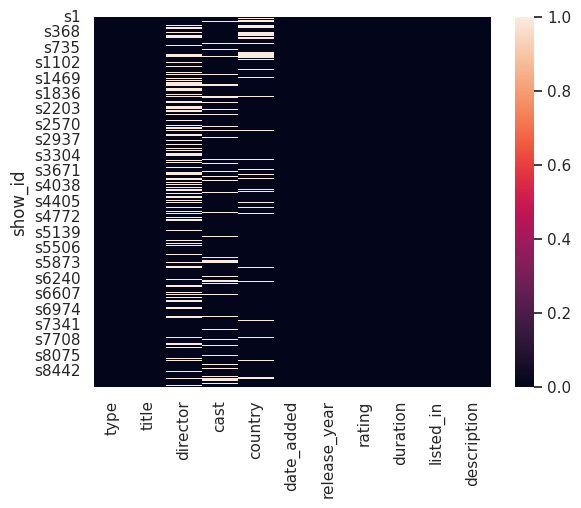

In [95]:
sns.heatmap(df.isnull()) # from this chart we can realize that 5 cols have Null values {'director' ,'cast' ,'country','date_added','duration'}

In [96]:
df.info()  #shows  col name , no of NUll values , Data Types

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [97]:
# Total number of null values in the dataframe 
df.isnull().sum().sum() 

4307

In [98]:
print("Col 'cast' contains     : (",df['cast'].isnull().sum() ,") Null value")
print("Col 'director' contains : (",df['director'].isnull().sum() ,") Null value")
print("Col 'director' contains : (",df['country'].isnull().sum() ,") Null value")

Col 'cast' contains     : ( 825 ) Null value
Col 'director' contains : ( 2634 ) Null value
Col 'director' contains : ( 831 ) Null value


<h6>they have many Null values so droping rows that have cast Null will affect the data 


In [99]:
#replacing Null Values in these cols by"Unkown" val

df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].replace(np.nan, "Unknown ")
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [100]:
#drop rows that contain "rating" or "duration" or "date_added" Null Value
df.dropna(subset=['rating','duration','date_added'],inplace =True) 
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [101]:
df.isnull().sum() #Done✅✅

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<h6> Now Data does not contain any Null Values

<h3>COL "date_added"

In [102]:
df[ 'date_added'].dtype 

dtype('O')

In [103]:
#convert its Data Type from "object" to "Date"
df[ 'date_added']= df['date_added'].apply(pd.to_datetime)
df[ 'date_added'].dtype 

dtype('<M8[ns]')

In [104]:
#splilting Year from date_added col
df['loading_Year'] = df ['date_added'].dt.year
df['loading_Year'] 

show_id
s1       2021
s2       2021
s3       2021
s4       2021
s5       2021
         ... 
s8803    2019
s8804    2019
s8805    2019
s8806    2020
s8807    2019
Name: loading_Year, Length: 8790, dtype: int32

In [105]:
#splilting month from date_added col and covert val to Month name
df['loading_Month']= df ['date_added'].dt.month_name()
df['loading_Month']

show_id
s1       September
s2       September
s3       September
s4       September
s5       September
           ...    
s8803     November
s8804         July
s8805     November
s8806      January
s8807        March
Name: loading_Month, Length: 8790, dtype: object

In [106]:
#Now we can drop "date_added" col
df.drop("date_added",axis=1,inplace=True)

In [107]:
#Checking statistics of columns for the int data type
df.describe(include=['int'])

,release_year,loading_Year
count,8790.000000,8790.000000
mean,2014.183163,2018.873606
std,8.825466,1.573568
min,1925.000000,2008.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


<h3>Split duration col 

In [108]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [109]:
df[['Minutes','Units']]=df['duration'].str.split(' ',expand=True)

In [110]:
#Spliting
df[['Minutes','Units']]=df['duration'].str.split(' ',expand=True)
#convert type
df['Minutes'].astype(int)

show_id
s1        90
s2         2
s3         1
s4         1
s5         2
        ... 
s8803    158
s8804      2
s8805     88
s8806     88
s8807    111
Name: Minutes, Length: 8790, dtype: int64

<h1>Cleaning Done✅✅
<h1> It is time to  make a deep Exploratoration with some Visalizations📊📈📉

In [111]:
df_temp=df[['loading_Year','release_year']]
df_temp

,loading_Year,release_year
show_id,,
s1,2021,2020
s2,2021,2021
s3,2021,2021
s4,2021,2021
s5,2021,2021
...,...,...
s8803,2019,2007
s8804,2019,2018
s8805,2019,2009


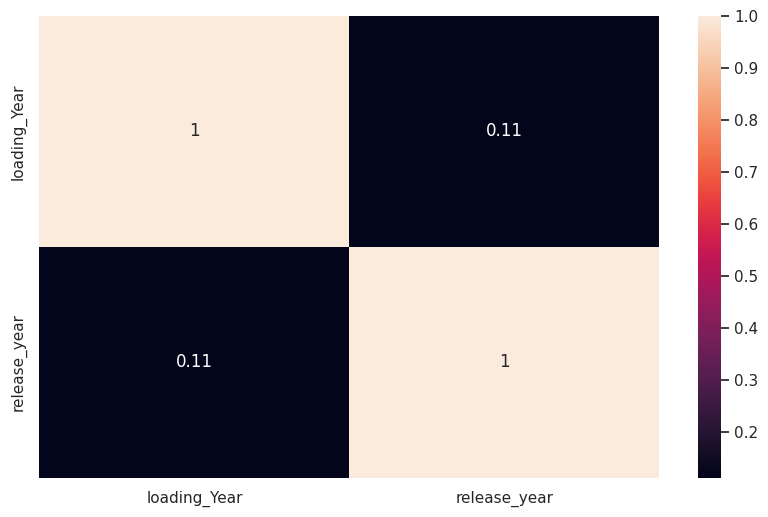

In [112]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_temp.corr(), annot=True) ##visualizing relationships or patterns in a dataset
plt.show()

<h3>no of Movies & TV shows that loaded for each Year

In [113]:
df['loading_Year'].value_counts().reset_index(name='count')

,loading_Year,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11


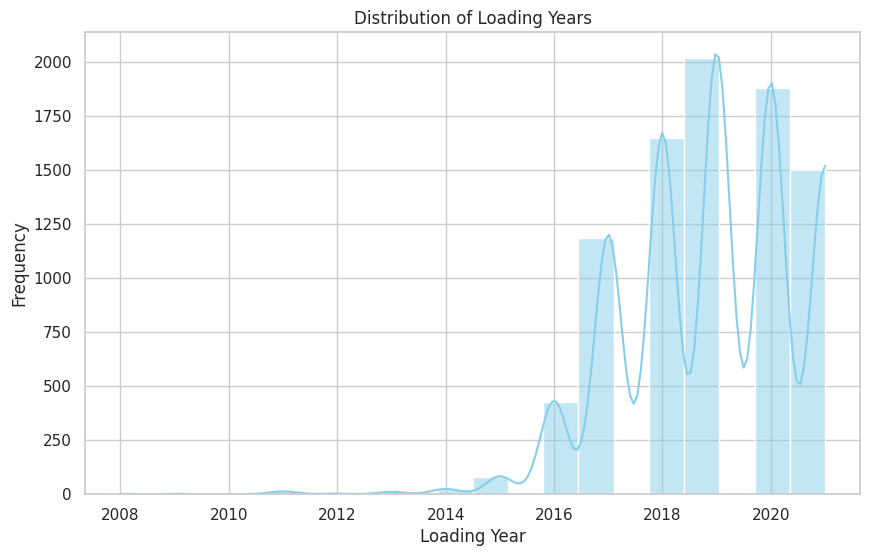

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loading_Year', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Loading Years')
plt.xlabel('Loading Year')
plt.ylabel('Frequency')
plt.show()

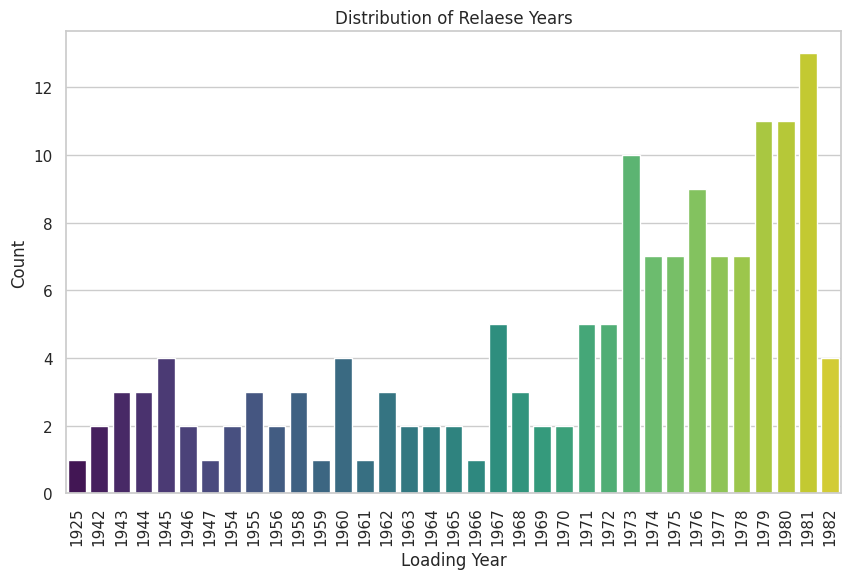

In [115]:
df_temp=df['release_year'].sort_values().head(150)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x=df_temp, palette='viridis')
plt.xlabel('Loading Year')
plt.ylabel('Count')
plt.title('Distribution of Relaese Years')
plt.xticks(rotation=90)  # Rotate x-axis labels f

plt.show()


<h3>How many Movies & TV Shows are in the dataset?

In [116]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [117]:
type_counts=df.groupby('type')['type'].count().reset_index(name='count')
#type_counts=df['type'].value_counts().reset_index(name='count') #another way
type_counts

,type,count
0,Movie,6126
1,TV Show,2664


/tmp/ipykernel_42/408895320.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=type_counts['type'],y= type_counts['count'],  palette='Set2', ci=None)


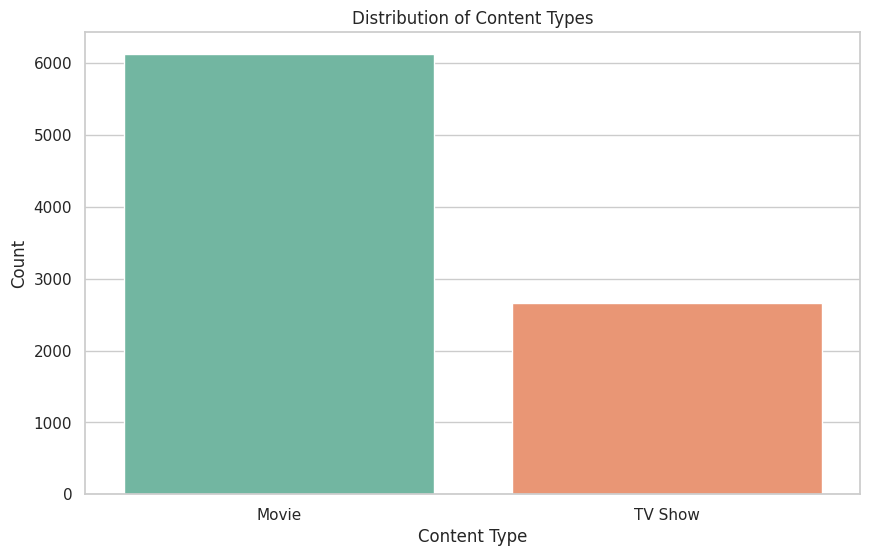

In [118]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts['type'],y= type_counts['count'],  palette='Set2', ci=None)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.show()

<h3>How many and what movies that released in 2000

In [119]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'loading_Year',
       'loading_Month', 'Minutes', 'Units'],
      dtype='object')

In [120]:
df[(df['type']=='Movie' )& (df['release_year']==2000)]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,loading_Year,loading_Month,Minutes,Units
show_id,,,,,,,,,,,,,,
s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",Unknown,2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ...",2021,September,107,min
s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...,2021,August,130,min
s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer...",2021,August,111,min
s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany",2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,2021,July,98,min
s594,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,2000,PG,89 min,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",2021,July,89,min
s780,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,2000,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy","In the year 3000, an alien race known as the P...",2021,June,118,min
s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,2000,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...,2021,May,99,min
s3473,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States",2000,G,79 min,"Children & Family Movies, Comedies",The Rugrats take to the big screen and visit P...,2019,October,79,min
s4546,Movie,Monty Python: Before the Flying Circus,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",United Kingdom,2000,TV-MA,56 min,"Comedies, Documentaries",Discover how six seemingly ordinary but suprem...,2018,October,56,min


In [121]:
print("There are :",len(df[(df['type']=='Movie' )& (df['release_year']==2000)]),"Movie released in 2000")
#print("There are :",df[(df['type']=='Movie' )& (df['release_year']==2000)].shape[0],"Movie released in 2000") #another way

There are : 33 Movie released in 2000


<h3>show only titles of all TV Shows that released in Egypt 

In [122]:
df[(df['type']=='TV Show')&(df['country']=='Egypt') ]['title']

show_id
s1202    Abla Fahita: Drama Queen
s1230                      My Way
s1571            Once Upon a Time
s1659                   Valentino
s1738                  Paranormal
s4023                 More to Say
s4024       The Land of Hypocrisy
s4027              Eugenie Nights
s4028                This Evening
s4031               Disappearance
s4126    The Last of the Schmucks
s4127               Hidden Worlds
s4131                       Tayee
s4985          Secret of the Nile
Name: title, dtype: object

In [123]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [124]:
print("There are :",len(df[(df['type']=='TV Show')&(df['country']=='Egypt') ]),"TV Shows that released in Egypt ")
#print("There are :",df[(df['type']=='TV Show')&(df['country']=='Egypt') ].shape[0],"TV Shows that released in Egypt only") #another way

There are : 14 TV Shows that released in Egypt 


<h3>Show top 15 directors , who gave the heighest num of Movies and TV Shows to Netflex

In [125]:
df['director'].value_counts().iloc[1:11]
#we start from index 1 as 0 is unknown "Nan"

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64

In [126]:
print("first top 10 are:")
i=0
for name in df['director'].value_counts().iloc[1:11].index:
    i+=1
    print(i,">>",name)

first top 10 are:
1 >> Rajiv Chilaka
2 >> Raúl Campos, Jan Suter
3 >> Suhas Kadav
4 >> Marcus Raboy
5 >> Jay Karas
6 >> Cathy Garcia-Molina
7 >> Martin Scorsese
8 >> Jay Chapman
9 >> Youssef Chahine
10 >> Steven Spielberg


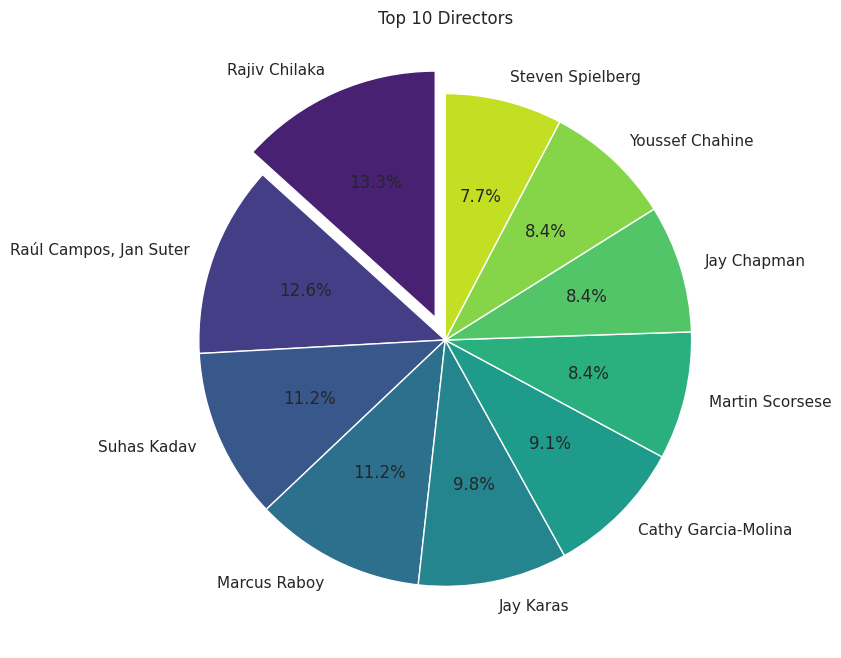

In [127]:
data = df['director'].value_counts().iloc[1:11].to_dict()
df2 = pd.DataFrame(list(data.items()), columns=['Director', 'Count'])
explode = (0.1, 0, 0,0,0,0,0,0,0,0)
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df2['Count'], labels=df2['Director'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', n_colors=10),explode=explode)
plt.title('Top 10 Directors')
plt.show()




<h3>Show all Movies that is directord by "Youssef Chahine" in Egypt

In [128]:
df[ (df['type']=='Movie')&(df['director']=='Youssef Chahine') &(df['country']=="Egypt")]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,loading_Year,loading_Month,Minutes,Units
show_id,,,,,,,,,,,,,,
s530,Movie,Return of the Prodigal Son,Youssef Chahine,"Majida El Roumi, Souheir El Morshidy, Shoukry ...",Egypt,1976,TV-MA,124 min,"Dramas, International Movies","Freed after spending 12 years in jail, a man's...",2021,July,124,min
s2368,Movie,An Egyptian Story,Youssef Chahine,"Nour El-Sherif, Magda El-Khatib, Yousra, Mohse...",Egypt,1982,TV-MA,129 min,"Classic Movies, Dramas, Independent Movies","While undergoing heart surgery in London, Yehi...",2020,June,129,min
s2369,Movie,Cairo Station,Youssef Chahine,"Farid Shawqy, Hind Rostom, Youssef Chahine, Ha...",Egypt,1958,TV-14,73 min,"Classic Movies, Dramas, International Movies",A Cairo newsstand vendor's fantasies morph int...,2020,June,73,min
s2370,Movie,Dark Waters,Youssef Chahine,"Faten Hamama, Omar Sharif, Ahmed Ramzy, Hussei...",Egypt,1956,TV-14,104 min,"Classic Movies, Dramas, International Movies",A fisherman returns home after a three-year ab...,2020,June,104,min
s2374,Movie,Saladin,Youssef Chahine,"Ahmad Mazhar, Salah Zo El Faqqar, Nadia Lotfi,...",Egypt,1963,TV-MA,194 min,"Action & Adventure, Classic Movies, Dramas",The Sultan of Egypt and Syria launches a campa...,2020,June,194,min
s2376,Movie,The Blazing Sun,Youssef Chahine,"Omar Sharif, Faten Hamama, Zaki Rostom, Farid ...",Egypt,1954,TV-14,116 min,"Classic Movies, Dramas, International Movies",Competition between sugar cane producers turns...,2020,June,116,min
s2377,Movie,The Land,Youssef Chahine,"Hamdy Ahmed, Nagwa Ibrahim, Ezzat El Alaili, T...",Egypt,1970,TV-MA,130 min,"Classic Movies, Dramas, International Movies",A group of peasant farmers fights to protect t...,2020,June,130,min


In [129]:
print("Youssef Chahine made ",len(df[ (df['type']=='Movie')&(df['director']=='Youssef Chahine') &(df['country']=="Egypt")]),"Movies in Egypt")

Youssef Chahine made  7 Movies in Egypt


<h3>In how many Movies and TV shows , duration was 100 minute

In [130]:
df[df['duration']=='100 min']

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,loading_Year,loading_Month,Minutes,Units
show_id,,,,,,,,,,,,,,
s55,Movie,InuYasha the Movie: Affections Touching Across...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,2001,TV-PG,100 min,"Action & Adventure, Anime Features, Internatio...",A powerful demon has been sealed away for 200 ...,2021,September,100,min
s141,Movie,"El patrón, radiografía de un crimen",Sebastián Schindel,"Joaquín Furriel, Luis Ziembrowski, Guillermo P...","Argentina, Venezuela",2014,TV-MA,100 min,"Dramas, International Movies, Thrillers",A lawyer defends an illiterate man whose explo...,2021,September,100,min
s301,Movie,Vivo,"Kirk DeMicco, Brandon Jeffords","Lin-Manuel Miranda, Ynairaly Simo, Zoe Saldana...","Canada, United States",2021,PG,100 min,"Children & Family Movies, Music & Musicals",A music-loving kinkajou embarks on the journey...,2021,August,100,min
s456,Movie,Emicida: AmarElo - Live in São Paulo,Fred Ouro Preto,Emicida,Unknown,2021,TV-MA,100 min,"Documentaries, International Movies, Music & M...",Brazilian rapper Emicida brings his progressiv...,2021,July,100,min
s462,Movie,The Unknown Saint,Alaa Eddine Aljem,"Younes Bouab, Salah Bensalah, Bouchaib Essamak...",Unknown,2019,TV-14,100 min,"Comedies, Dramas, Independent Movies","Following a stint behind bars, a thief returns...",2021,July,100,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8563,Movie,The Women's Balcony,Emil Ben-Shimon,"Evelin Hagoel, Igal Naor, Orna Banay, Einat Sa...",Israel,2016,TV-PG,100 min,"Comedies, Dramas, Faith & Spirituality",A conservative rabbi steps in to lead a congre...,2017,December,100,min
s8623,Movie,Tremors 2: Aftershocks,S.S. Wilson,"Fred Ward, Chris Gartin, Helen Shaver, Michael...",Unknown,1995,PG-13,100 min,"Comedies, Horror Movies, Sci-Fi & Fantasy",A rag-tag team of survivalists and scientists ...,2020,January,100,min
s8628,Movie,Trespass Against Us,Adam Smith,"Michael Fassbender, Brendan Gleeson, Lyndsey M...",United Kingdom,2016,R,100 min,Dramas,A man from a criminal family yearns to break a...,2019,February,100,min


In [131]:
print(len(df[df['duration']=='100 min']) ,"Movies and TV shows have a duration  100 minute")

108 Movies and TV shows have a duration  100 minute


<h3>Show different Ratings defned by Netfilx

In [132]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'loading_Year',
       'loading_Month', 'Minutes', 'Units'],
      dtype='object')

In [133]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

<h3>How many Movies got "TV-14" in "Germany"

In [134]:
df[(df['type']=="Movie")&(df['rating']=='TV-14')&(df['country']=='Germany')]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,loading_Year,loading_Month,Minutes,Units
show_id,,,,,,,,,,,,,,
s706,Movie,Biking Borders,Max Jabs,"Max Jabs, Nono Konopka",Germany,2019,TV-14,89 min,"Documentaries, International Movies, Sports Mo...",Best friends Max and Nono bike from Berlin to ...,2021,June,89,min
s1032,Movie,Into the Beat,Stefan Westerwelle,"Alexandra Pfeifer, Yalany Marschner, Trystan P...",Germany,2020,TV-14,102 min,"Dramas, International Movies, Romantic Movies",A teen ballerina discovers hip-hop by chance a...,2021,April,102,min
s1253,Movie,How to Be Really Bad,Marco Petry,"Emma Bading, Janina Fautz, Ludwig Simon, Samue...",Germany,2018,TV-14,100 min,"Comedies, International Movies",The devil's sassy (and bored) daughter makes a...,2021,March,100,min
s4872,Movie,My Fuhrer,Dani Levy,"Helge Schneider, Ulrich Mühe, Sylvester Groth,...",Germany,2007,TV-14,91 min,"Comedies, International Movies",Germany's most celebrated actor is commissione...,2018,May,91,min
s5012,Movie,Schubert In Love,Lars Büchel,"Olaf Schubert, Mario Adorf, Marie Leuenberger,...",Germany,2016,TV-14,94 min,"Comedies, International Movies","The last of his family line, Olaf Schubert doe...",2018,March,94,min
s5107,Movie,Bibi & Tina: Tohuwabohu Total,Detlev Buck,"Lina Larissa Strahl, Lisa-Marie Koroll, Louis ...",Germany,2017,TV-14,106 min,"Children & Family Movies, Music & Musicals",Teen witch Bibi and her pal Tina return to the...,2017,December,106,min
s5528,Movie,Bibi & Tina II,Detlev Buck,"Lina Larissa Strahl, Lisa-Marie Koroll, Louis ...",Germany,2014,TV-14,105 min,"Children & Family Movies, Music & Musicals","When robbers hit Falkenstein castle, teen witc...",2017,April,105,min
s5529,Movie,Bibi & Tina: Girls Versus Boys,Detlev Buck,"Lina Larissa Strahl, Lisa-Marie Koroll, Tilman...",Germany,2016,TV-14,107 min,"Children & Family Movies, Music & Musicals","At summer camp, young Bibi and her friends are...",2017,April,107,min
s8441,Movie,The NSU-Complex,"Stefan Aust, Dirk Laabs",Unknown,Germany,2016,TV-14,90 min,"Documentaries, International Movies","For 13 years, the underground neo-Nazi organiz...",2016,December,90,min


In [135]:
print(len(df[(df['type']=="Movie")&(df['rating']=='TV-14')&(df['country']=='Germany')])," Movies got 'TV-14' in 'Germany'")

9  Movies got 'TV-14' in 'Germany'


<h3>How many TV Show got the "R" rating after year 2010

In [136]:
df[(df['type']=="TV Show")&(df['rating']=='R')&(df['release_year']>2010)]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,loading_Year,loading_Month,Minutes,Units
show_id,,,,,,,,,,,,,,
s3894,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",Unknown,2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019,April,1,Season
s7594,TV Show,Nobel,Unknown,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,2016,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016,December,1,Season


In [137]:
print(len(df[(df['type']=="TV Show")&(df['rating']=='R')&(df['release_year']>2010)]),'TV Show got the "R" rating after year 2010')

2 TV Show got the "R" rating after year 2010


<h3>Which Country has the heighest no of TV Shows

In [138]:
df[df['type']=='TV Show']['country'].value_counts()

country
United States                                    754
Unknown                                          390
United Kingdom                                   212
Japan                                            167
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: count, Length: 197, dtype: int64

In [139]:
print("(",df[df['type']=='TV Show']['country'].value_counts().index[0],") is the country that has the heighest no of TV Shows ")

( United States ) is the country that has the heighest no of TV Shows 


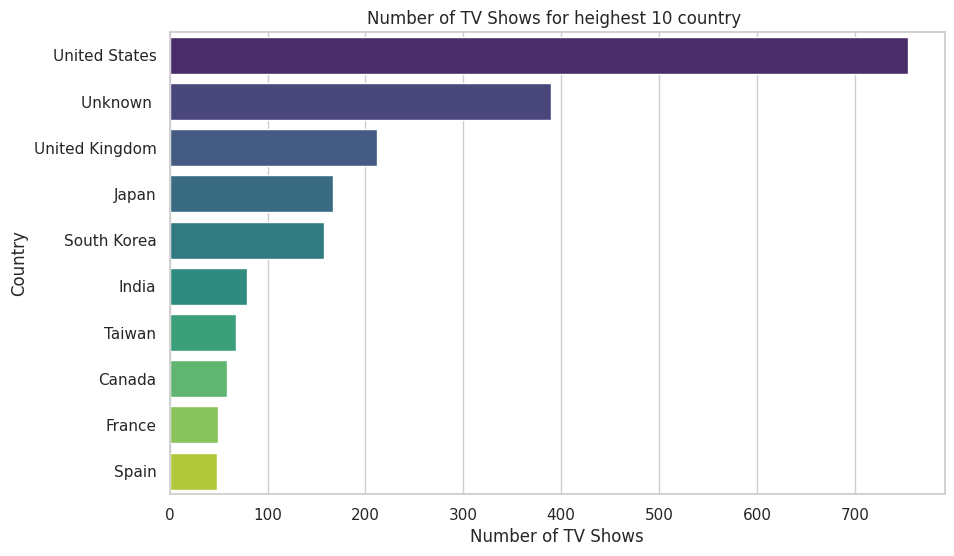

In [147]:
data = df[df['type']=='TV Show']['country'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=data.values, y=data.index, palette='viridis')
plt.title('Number of TV Shows for heighest 10 country ')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.show()


<h3>Show all Dramas Moives 

In [141]:
df[(df['type']=='Movie')&(df['listed_in']=='Dramas')]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,loading_Year,loading_Month,Minutes,Units
show_id,,,,,,,,,,,,,,
s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",Unknown,2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ...",2021,September,119,min
s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...,2021,September,108,min
s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...,2021,September,124,min
s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong",2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl...",2021,September,118,min
s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,2021,August,142,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8675,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden",2017,NR,106 min,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...,2017,December,106,min
s8676,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,2015,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",2017,July,110,min
s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,2019,June,99,min


In [142]:
print("There are (",len(df[(df['type']=='Movie')&(df['listed_in']=='Dramas')]),") Dramas Moives")

There are ( 137 ) Dramas Moives


In [143]:
df_filter = df[(df["release_year"] < 2020) & (df["release_year"] > 1900)]
df_filter =df_filter .head(2000)

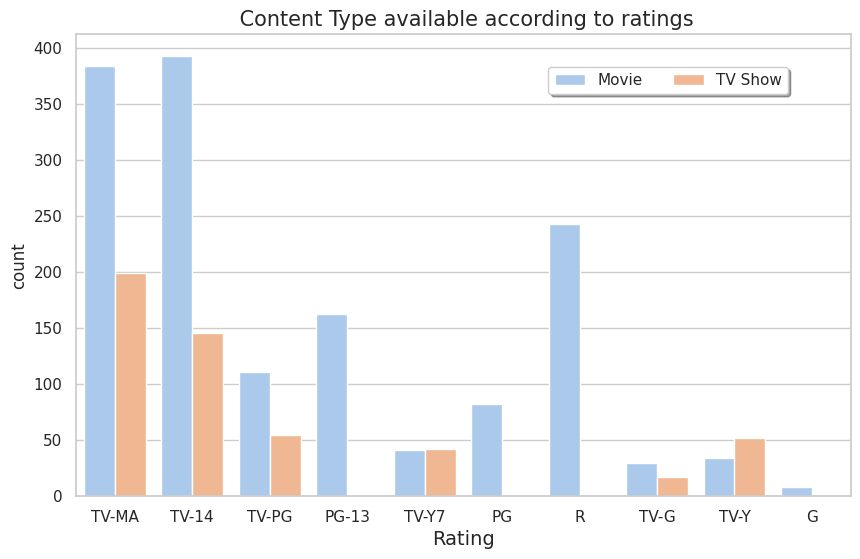

In [145]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=df_filter, x='rating', hue='type', palette='pastel')
plt.title(' Content Type available according to ratings', fontsize=15)
plt.xlabel('Rating', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(0.600,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.show()

<h1>Wish You Luck
<h3>Esraa Meslam